         user              first_open  dayofweek  hour  age  \
0      235136 2012-12-27 02:14:51.273          3     2   23   
1      333588 2012-12-02 01:16:00.905          6     1   24   
2      254414 2013-03-19 19:19:09.157          1    19   23   
3      234192 2013-07-05 16:08:46.354          4    16   28   
4       51549 2013-02-26 18:50:48.661          1    18   31   
...       ...                     ...        ...   ...  ...   
49995  222774 2013-05-09 13:46:17.871          3    13   32   
49996  169179 2013-04-09 00:05:17.823          1     0   35   
49997  302367 2013-02-20 22:41:51.165          2    22   39   
49998  324905 2013-04-28 12:33:04.288          6    12   27   
49999   27047 2012-12-14 01:22:44.638          4     1   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_review,product_review2,Scan...          13   
2                          

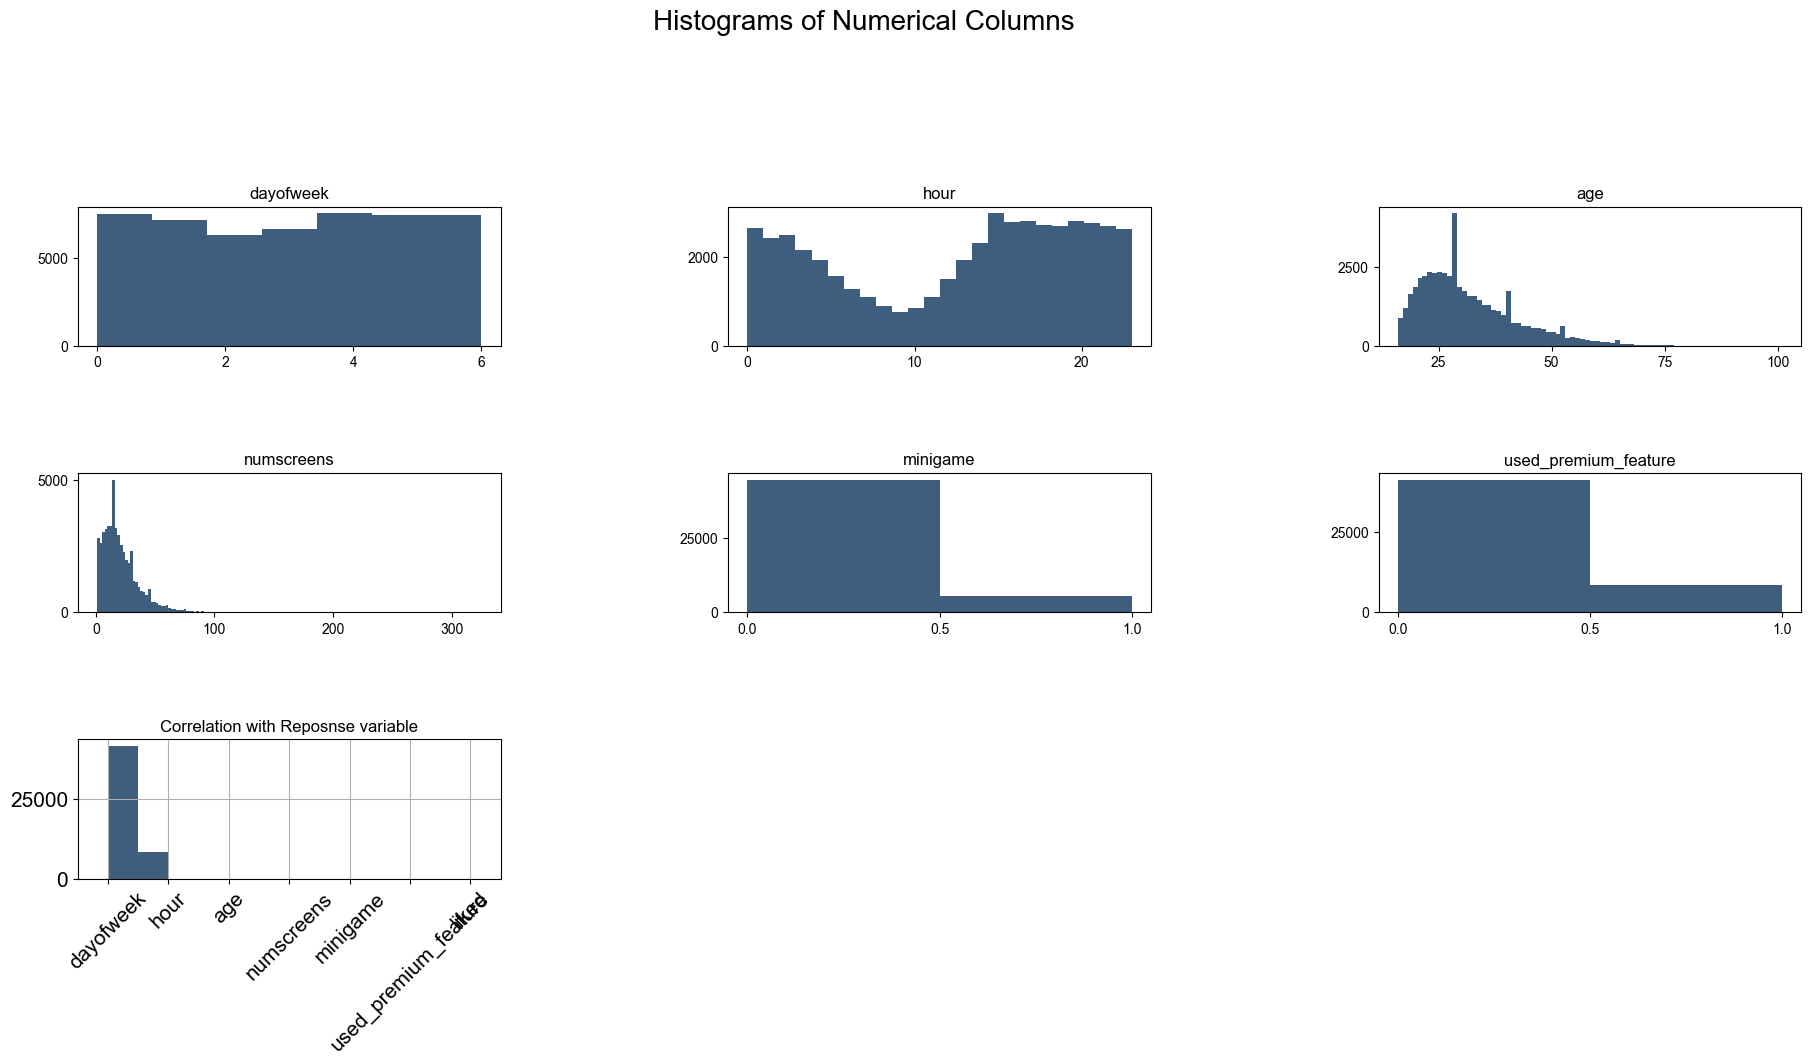

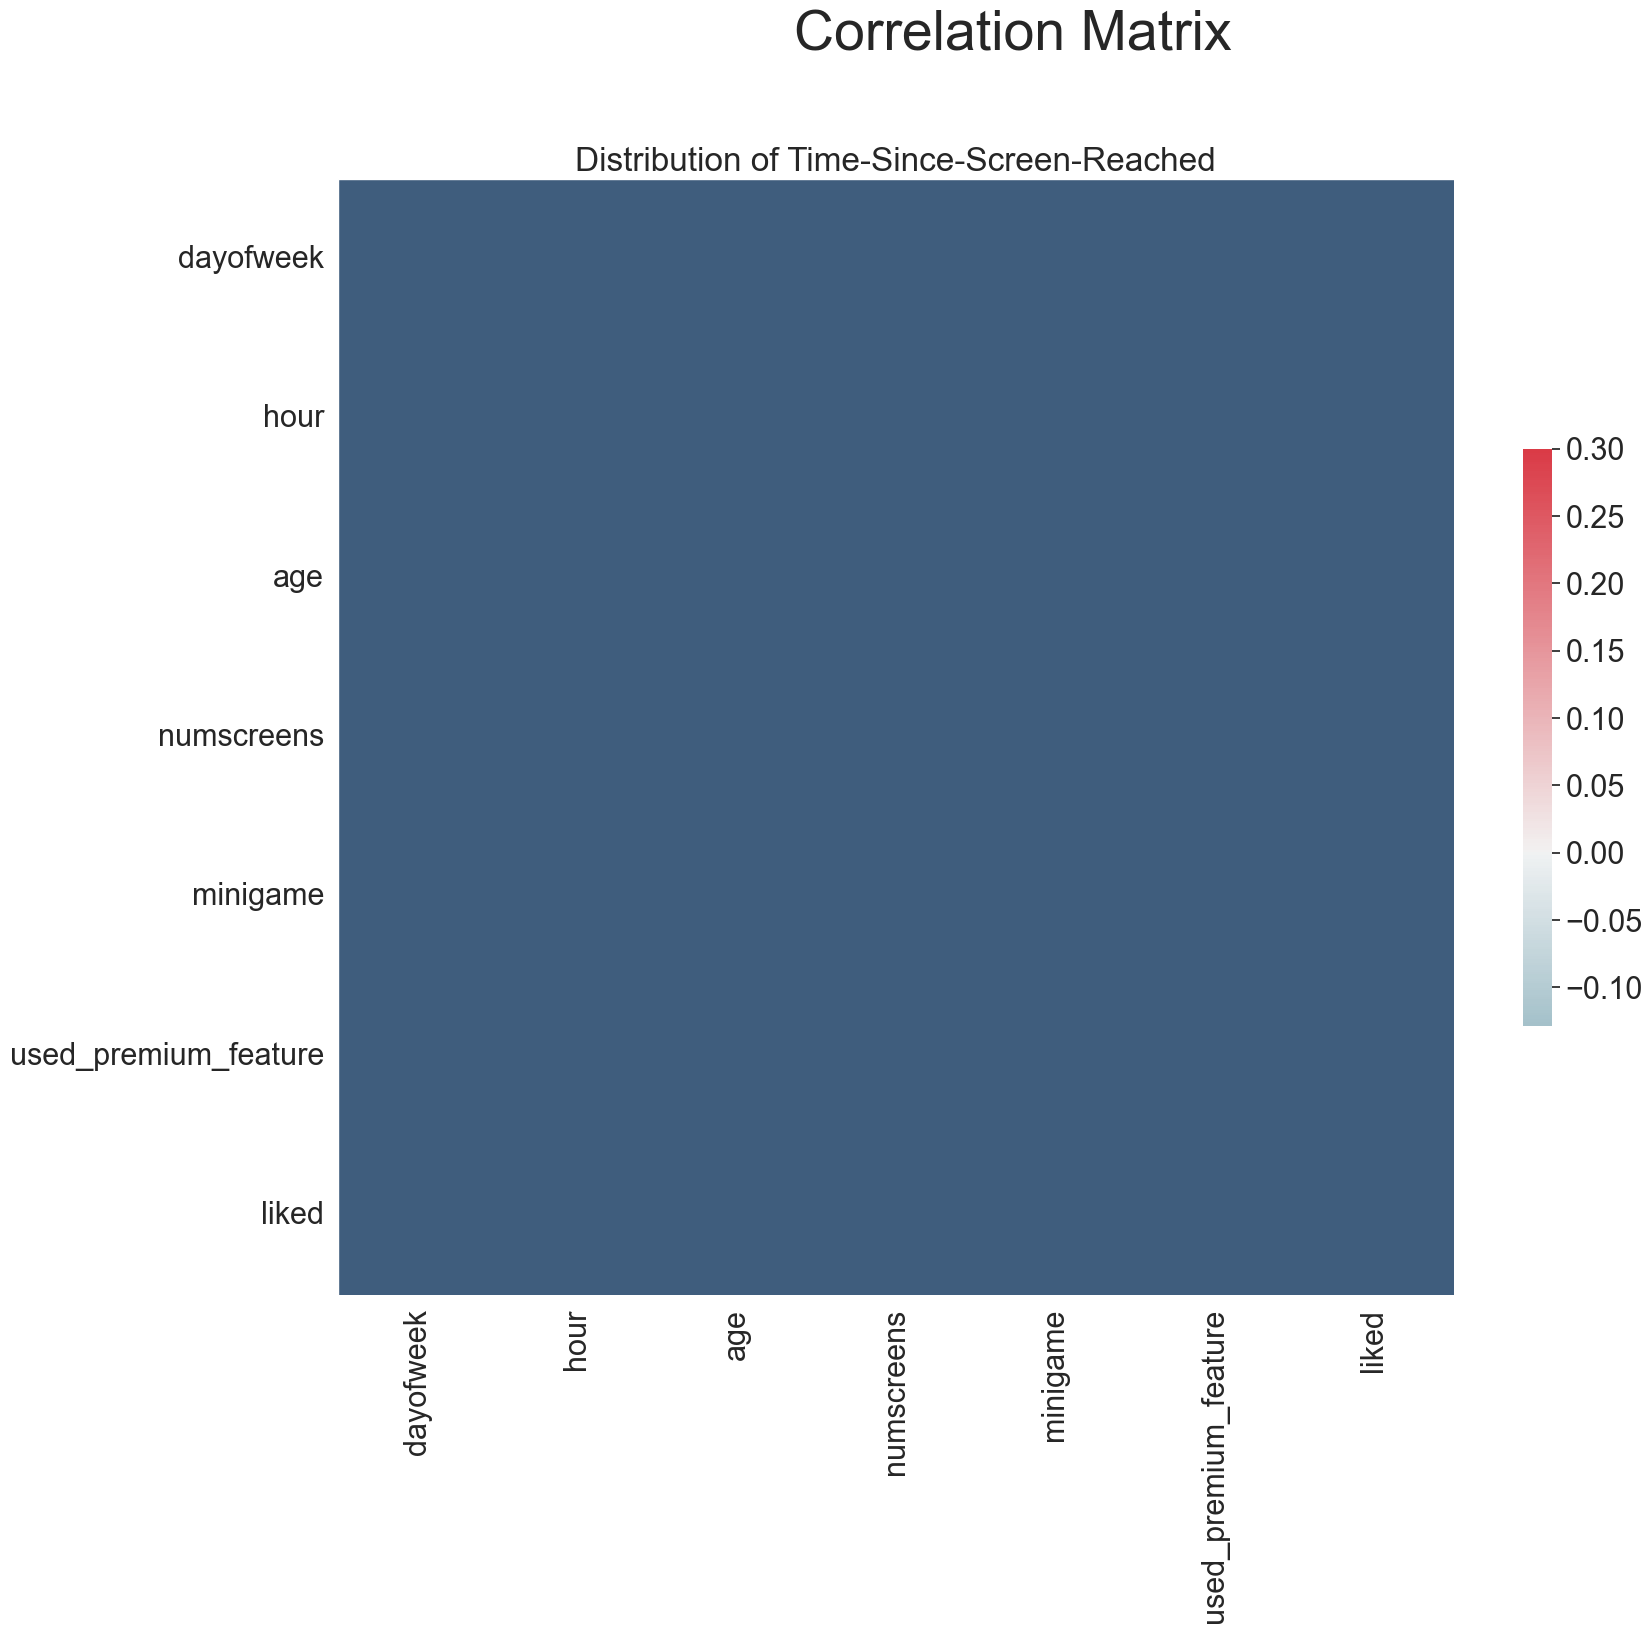

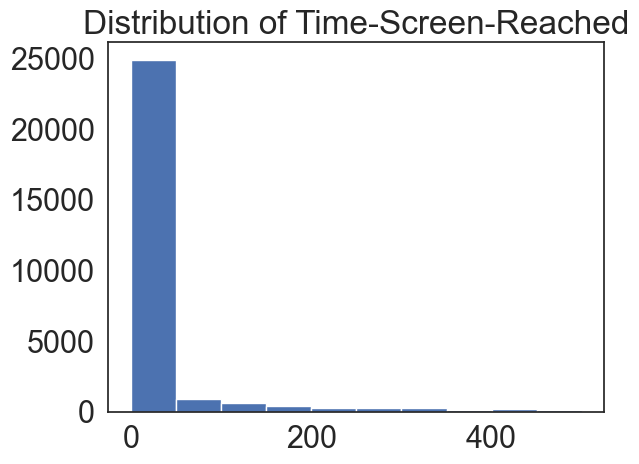

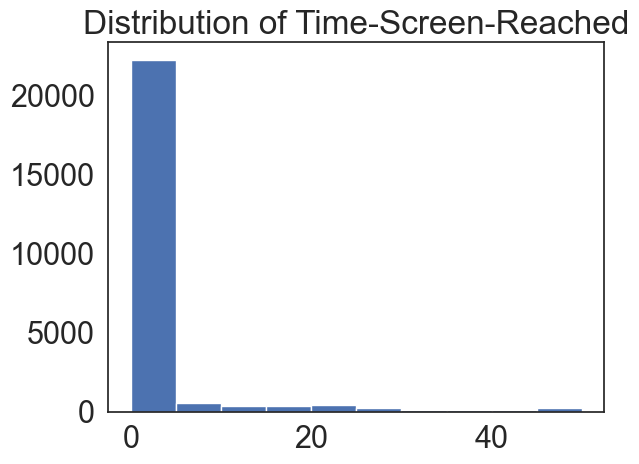

In [1]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn


dataset = pd.read_csv(r"C:\Users\sulta\OneDrive\Documents\MLC\appdata10.csv")
dataset.head(10) # Viewing the Data
dataset.describe() # Distribution of Numerical Variables
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int)
dataset
### Plotting
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date',
                                           'first_open', 'enrolled'])
dataset2
dataset2.head()
## Histograms
plt.suptitle('Histograms of Numerical Columns', fontsize=20)

for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()

    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())

    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Correlation with Response Variable
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 15, rot = 45,
                  grid = True)
## Correlation Matrix
sn.set(style="white", font_scale=2)
# Compute the correlation matrix
corr = dataset2.corr()
corr
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)#, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#### Feature Engineering ####


# Formatting Date Columns
dataset.dtypes
from dateutil import parser
import pandas as pd

# Assuming dataset is a pandas DataFrame
dataset["first_open"] = [parser.parse(row_date) if isinstance(row_date, str) else pd.NaT for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else pd.NaT for row_date in dataset["enrolled_date"]]

dataset.dtypes
print(dataset)

dataset["enrolled"]
import matplotlib.pyplot as plt

# Check and handle missing values in 'enrolled_date' and 'first_open'
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).dt.total_seconds() / 3600

# Drop rows with missing values in the 'difference' column
response_hist = plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

histogram_range=(0,500)
response_hist = plt.hist(dataset["difference"].dropna(), range=histogram_range)
plt.title("Distribution of Time-Screen-Reached")
plt.show()
#most of the users have screen time in the first 100 hrs


histogram_range=(0,50)
response_hist = plt.hist(dataset["difference"].dropna(), range=histogram_range)
plt.title("Distribution of Time-Screen-Reached")
plt.show()
#most of the users have screen time in the first 10 hrs

dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])
dataset
## Formatting the screen_list Field

# Load Top Screens
top_screens = pd.read_csv(r"C:\Users\sulta\OneDrive\Documents\MLC\top_screens.csv").top_screens.values
top_screens
# Mapping Screens to Fields
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

dataset

dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])

dataset

# Funnels
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset[savings_screens]
dataset
dataset = dataset.drop(columns=savings_screens)
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)
dataset
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)
dataset
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)
dataset
dataset.head()
dataset.describe()
dataset.columns
dataset.to_csv('new_appdata10.csv', index = False)

In [2]:
df = pd.read_csv(r"C:\Users\sulta\OneDrive\Documents\MLC\appdata10.csv")
df.describe()


,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
dataset['enrolled'] = pd.to_numeric(dataset['enrolled'], errors='coerce') #converting string to numeric and non-convertible to NaN.
dataset.groupby('enrolled').mean()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
enrolled,,,,,,,,,,,,,,,,,,,,,
0,186806.543767,2.999564,12.966446,33.322294,17.304248,0.104748,0.189902,0.165669,0.366121,0.289533,...,0.010352,0.012613,0.018721,0.008964,0.009122,4.788046,0.332289,0.623805,0.162813,0.875421
1,186974.345705,3.060677,12.140961,30.098963,24.952717,0.110945,0.153831,0.164320,0.672005,0.297858,...,0.018155,0.014080,0.007988,0.007423,0.006011,7.664986,0.398314,1.236939,0.191149,0.699883


C:\Users\sulta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\sulta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

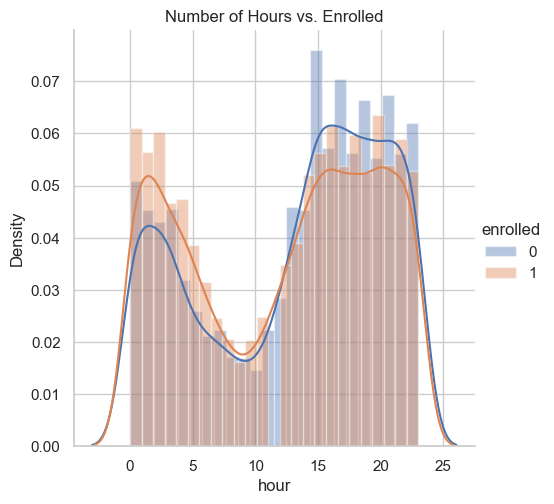

In [4]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
# Remove leading and trailing spaces from 'hour' column
df['hour'] = df['hour'].str.strip()

# Convert 'hour' to datetime
df['hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S')

# Extracting hour sa int
df['hour'] = df['hour'].dt.hour

sns.set(style="whitegrid", color_codes=True)
sns.FacetGrid(df, hue='enrolled', height=5).map(sns.distplot, 'hour').add_legend().set(title='Number of Hours vs. Enrolled')
plt.show()

C:\Users\sulta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\sulta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

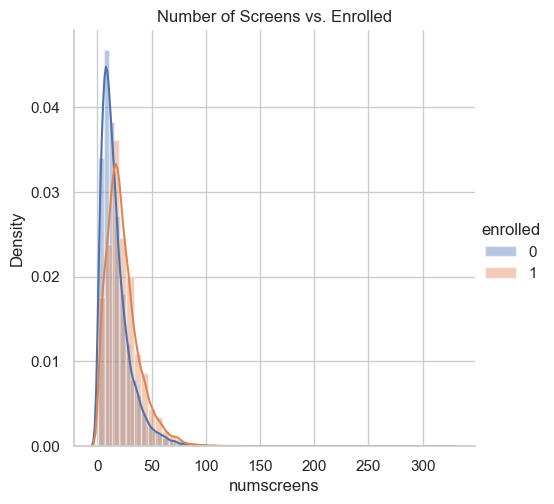

In [5]:
sns.FacetGrid(df, hue='enrolled', height=5).map(sns.distplot,'numscreens').add_legend().set(title='Number of Screens vs. Enrolled')
plt.show()

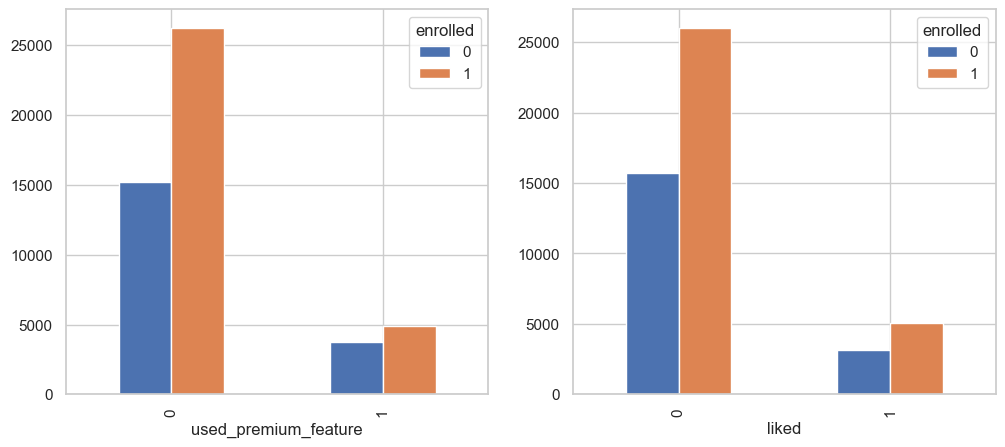

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
pd.crosstab(df.used_premium_feature,df.enrolled).plot(kind='bar', ax=ax1)
pd.crosstab(df.liked,df.enrolled).plot(kind='bar', ax=ax2)
plt.show()

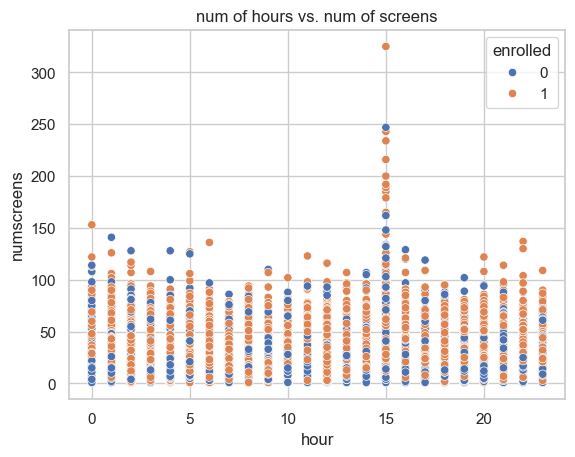

In [7]:
sns.scatterplot(x='hour', y='numscreens', hue='enrolled', data=df)
plt.title('num of hours vs. num of screens')
plt.show()

In [8]:
import pandas as pd
import statsmodels.stats.outliers_influence

print(df.dtypes)

# Check for constant columns
constant_cols = df.columns[df.nunique() == 1]
print("Constant Columns:", constant_cols)

# Exclude constant columns before calculating VIF
X = df.drop(['enrolled'] + list(constant_cols), axis=1)

# Select only numeric columns
numeric_cols = X.select_dtypes(include='number')

vif_df = pd.DataFrame()
vif_df['VIF'] = [statsmodels.stats.outliers_influence.variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif_df['Variable'] = numeric_cols.columns

print(vif_df)

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object
Constant Columns: Index([], dtype='object')
        VIF              Variable
0  3.426615                  user
1  2.886566             dayofweek
2  3.315907                  hour
3  5.308660                   age
4  2.431263            numscreens
5  1.134509              minigame
6  1.223794  used_premium_feature
7  1.185812                 liked


In [9]:
import statsmodels.stats.outliers_influence

while True:
    Cols = range(X.shape[1])

    # Convert non-numeric columns to numeric
    X_numeric = X.apply(pd.to_numeric, errors='coerce')
    
    # Handle missing values and infinite values
    X_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_numeric.dropna(inplace=True)

    if X_numeric.shape[0] == 0:
        break
    
    vif = np.array([statsmodels.stats.outliers_influence.variance_inflation_factor(X_numeric.values, i) for i in Cols]) #Variance Inflation Factor

    if all(vif < 5):
        break
    else:
        max_vif_idx = np.argmax(vif)
        Cols = np.delete(Cols, max_vif_idx)
        X = X.iloc[:, Cols]

# At this point, X will contain the features with VIF less than 5

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
y = dataset['enrolled']
X = dataset.drop(['enrolled'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # both fit() and transform() methods in one step.
X_test_scaled = scaler.transform(X_test) #transforming the data into a form that is more suitable for the model.


In [13]:
ann_model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
ann_model.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)

In [14]:
y_pred = ann_model.predict(X_test_scaled)
#we used predict to generate predicted labels by ann model to compare with the actual label that is y_test.
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred) #shows counts of true positive, true negative, false positive and false negative predictions
classification_rep = classification_report(y_test, y_pred) #produces a text summary of different classification metrics.

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.76
Confusion Matrix:
 [[3814 1302]
 [1098 3786]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76      5116
           1       0.74      0.78      0.76      4884

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

